# Best Seller Book Analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('best-selling-books.csv')

## Basic Analysis

In [3]:
# Display the first few rows of the DataFrame
print(df.head())

                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French             1943                          200.0   
2           English             1997                          120.0   
3           English             1939                          100.0   
4           Chinese             1791                          100.0   

                Genre  
0  Historical fiction  
1             Novella  
2             Fantasy  
3             Mystery  
4         Fami

In [4]:
# Get an overview of the columns and their data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB
None


In [5]:
# Compute summary statistics for numerical columns
print(df.describe())

       First published  Approximate sales in millions
count       174.000000                     174.000000
mean       1962.522989                      30.097126
std          64.268737                      27.957985
min        1304.000000                      10.000000
25%        1947.000000                      14.000000
50%        1974.000000                      20.000000
75%        1995.000000                      36.300000
max        2018.000000                     200.000000


In [6]:
# Filter the DataFrame to retrieve only the book names with missing genre values
missing_genre_books = df['Book'][df['Genre'].isnull()]

# Other possible alternative
# missing_genre_books = df.loc[df['Genre'].isnull(), 'Book']

# Display the book names with missing genre values
print(missing_genre_books)

85                                  The Bermuda Triangle
110                                  The Horse Whisperer
115                                        The Outsiders
116                            Guess How Much I Love You
117                                               Shōgun
118                                The Poky Little Puppy
120                                 Perfume (Das Parfum)
121                                  The Grapes of Wrath
122        The Shadow of the Wind (La sombra del viento)
123                              Interpreter of Maladies
124                                             Becoming
126                                 Tuesdays with Morrie
127                                    God's Little Acre
128       Follow Your Heart (Va' dove ti porta il cuore)
129                                    A Wrinkle in Time
130                                 Long Walk to Freedom
131                              The Old Man and the Sea
132                            

In [7]:
# Fill missing values in 'Genre' column with 'Other'
df['Genre'] = df['Genre'].fillna('Other')

# Verify the updated DataFrame
print(df['Genre'])

0      Historical fiction
1                 Novella
2                 Fantasy
3                 Mystery
4             Family saga
              ...        
169                 Other
170                 Other
171                 Other
172                 Other
173                 Other
Name: Genre, Length: 174, dtype: object


In [8]:
# Check for missing values in 'Genre' column
missing_values = df['Genre'].isnull().sum()

if missing_values == 0:
    print("No missing values in the 'Genre' column.")
else:
    print("There are still missing values in the 'Genre' column.")
    print(f"Number of missing values: {missing_values}")

No missing values in the 'Genre' column.


In [9]:
# Recheck the dataset for missing values
missing_values = df.isnull().any()

if missing_values.any():
    print("There are missing values in the dataset.")
    print("Columns with missing values:")
    print(missing_values[missing_values].index.tolist())
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [11]:
# Get the unique values of the 'Genre' column
unique_genres = df['Genre'].unique()

# Print the unique genres
print(unique_genres)

['Historical fiction' 'Novella' 'Fantasy' 'Mystery' 'Family saga'
 "Fantasy, Children's fiction" 'Adventure' 'Detective' 'Mystery thriller'
 'Coming-of-age' 'Romance' 'Self-help' 'Magic realism' 'Novel'
 "Children's fiction" 'Manual' "Children's novel" "Children's literature"
 'Historical novel, mystery' 'War, thriller' 'Sexology'
 "Children's Literature" 'Novella, Self-help'
 "Children's Literature, picture book" 'Essay/Literature'
 'Southern Gothic, Bildungsroman' 'Gothic horror, Family saga'
 'Popular science, Anthropology, Astrophysics, Cosmology, Philosophy, History'
 'Philosophical novel, Young adult' 'Mystery-thriller'
 'Socialist realist novel' 'Historical novel'
 'Historical non-fiction, Autobiography, Memoir, Bildungsroman / Coming of Age, Jewish literature'
 'Romantic family saga' 'Christian literature'
 'Bildungsroman, Historical fiction' 'Novel, tragedy' 'Gothic novel'
 'Dystopian, political fiction, social science fiction' 'Fiction'
 'Young adult fiction' 'Young adult his

In [12]:
# Define the maximum length for truncated genre values
max_length = 20

# Truncate genre values that exceed the maximum length
df['Truncated Genre'] = df['Genre'].apply(lambda x: x[:max_length] + '...' if len(x) > max_length else x)

# Get the unique truncated genre values
unique_truncated_genres = df['Truncated Genre'].unique()

# Print the unique truncated genres
print(unique_truncated_genres)

['Historical fiction' 'Novella' 'Fantasy' 'Mystery' 'Family saga'
 "Fantasy, Children's ..." 'Adventure' 'Detective' 'Mystery thriller'
 'Coming-of-age' 'Romance' 'Self-help' 'Magic realism' 'Novel'
 "Children's fiction" 'Manual' "Children's novel"
 "Children's literatur..." 'Historical novel, my...' 'War, thriller'
 'Sexology' "Children's Literatur..." 'Novella, Self-help'
 'Essay/Literature' 'Southern Gothic, Bil...' 'Gothic horror, Famil...'
 'Popular science, Ant...' 'Philosophical novel,...' 'Mystery-thriller'
 'Socialist realist no...' 'Historical novel' 'Historical non-ficti...'
 'Romantic family saga' 'Christian literature' 'Bildungsroman, Histo...'
 'Novel, tragedy' 'Gothic novel' 'Dystopian, political...' 'Fiction'
 'Young adult fiction' 'Young adult historic...' 'Self-help, motivatio...'
 'Popular science' 'Biographical novel' 'New-age spiritual no...'
 'Young adult romantic...' 'Thriller' 'Crime novel' 'Romance novel'
 'Young Adult novel, a...' 'Japanese novel' 'Science fic

In [13]:
# Compute additional statistical measures
sales_mean = df['Approximate sales in millions'].mean()
sales_median = df['Approximate sales in millions'].median()
sales_std = df['Approximate sales in millions'].std()

print("Mean sales:", sales_mean)
print("Median sales:", sales_median)
print("Standard deviation of sales:", sales_std)

Mean sales: 30.097126436781608
Median sales: 20.0
Standard deviation of sales: 27.95798546448718


In [14]:
# how to round the values to 2 decimal places
print("Mean sales:", round(sales_mean, 2))
print("Median sales:", round(sales_median, 2))
print("Standard deviation of sales:", round(sales_std, 2))

Mean sales: 30.1
Median sales: 20.0
Standard deviation of sales: 27.96


In [15]:
# Get the unique values of a column
unique_values = df['First published'].unique()

# Print the unique values
print(unique_values)

[1859 1943 1997 1939 1791 1937 1950 1887 1992 2003 1998 1999 2000 2005
 2007 1988 1951 1880 1984 1967 1955 1946 1908 1877 1980 1975 1972 1976
 1952 1902 1970 1969 1899 1960 1979 1991 1932 1869 1881 1947 1977 2002
 1966 1936 1925 1938 1949 2009 2008 1961 1945 1788 1934 1989 1935 1993
 2012 2015 2010 1957 1929 1974 1958 2004 1971 1986 1885 1982 1813 1923
 1963 2006 1973 1965 1964 1968 2018 1981 1995 2014 2011 1994 1942 1985
 2001 1933 1962 1956 1987 1948 1304 1978 2016 1953 1996]


In [16]:
# Convert the 'First published' column to a datetime format
try:
    df['First published'] = pd.to_datetime(df['First published'], format='%Y')
except pd.errors.OutOfBoundsDatetime:
    # Find the problematic rows
    problematic_rows = df[pd.to_datetime(df['First published'], format='%Y', errors='coerce').isnull()]
    
    # Display the problematic rows
    print(problematic_rows)

                                       Book        Author(s)  \
140  The Divine Comedy (La Divina Commedia)  Dante Alighieri   

    Original language  First published  Approximate sales in millions  Genre  \
140           Italian             1304                           11.5  Other   

    Truncated Genre  
140           Other  


In [17]:
# Check the row information of a specific index
row_info = df.loc[140]

# Print the row information
print(row_info)

Book                             The Divine Comedy (La Divina Commedia)
Author(s)                                               Dante Alighieri
Original language                                               Italian
First published                                                    1304
Approximate sales in millions                                      11.5
Genre                                                             Other
Truncated Genre                                                   Other
Name: 140, dtype: object


In [18]:
# Drop the specific row
df = df.drop(index=140)

## Basic Charts

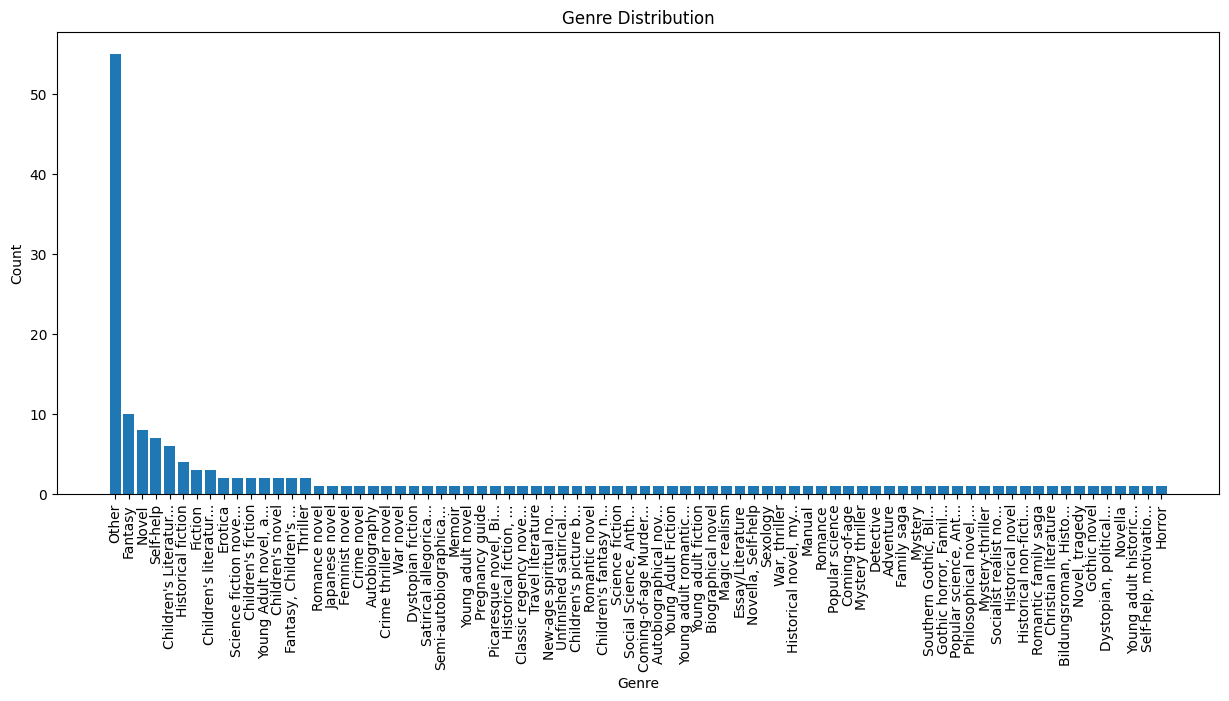

In [19]:
# Count the occurrences of each genre
genre_counts = df['Truncated Genre'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(15, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()

In [20]:
# Calculate the number of books per author
books_per_author = df['Author(s)'].value_counts()

# Identify the most prolific authors
most_prolific_authors = books_per_author.head(10)

print("Top 10 Most Prolific Authors:")
print(most_prolific_authors)

Top 10 Most Prolific Authors:
Author(s)
J. K. Rowling       7
Suzanne Collins     3
Dan Brown           3
Roald Dahl          3
Erskine Caldwell    2
Ken Follett         2
Albert Camus        2
E. L. James         2
George Orwell       2
Charles Dickens     1
Name: count, dtype: int64


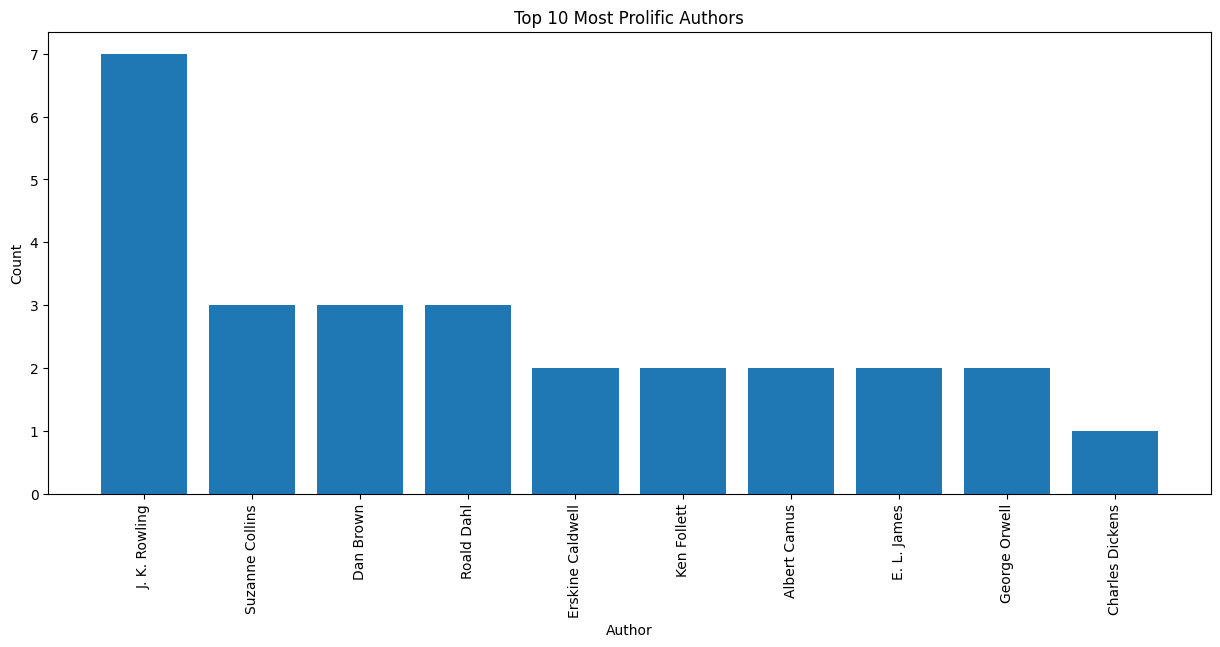

In [21]:
# Plot the most prolific authors
plt.figure(figsize=(15, 6))
plt.bar(most_prolific_authors.index, most_prolific_authors.values)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Top 10 Most Prolific Authors')
plt.xticks(rotation=90)
plt.show()

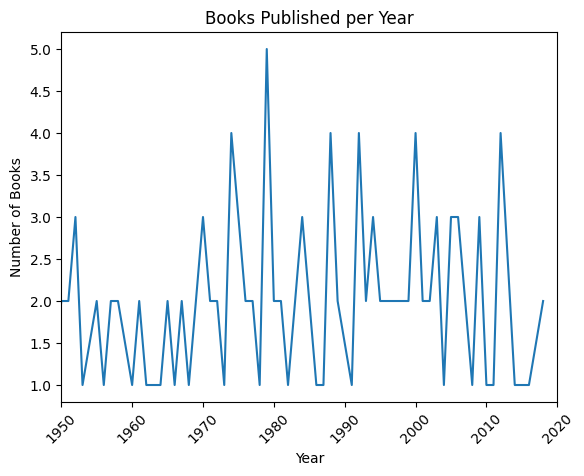

In [22]:
# Group the data by publication year and calculate the number of books published each year
books_per_year = df.groupby('First published')['Book'].count()

# Plot the number of books published per year
plt.plot(books_per_year.index, books_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Books')
# add a xlim() call to limit the x-axis range
plt.xlim(1950, 2020)
plt.title('Books Published per Year')
plt.xticks(rotation=45)
plt.show()

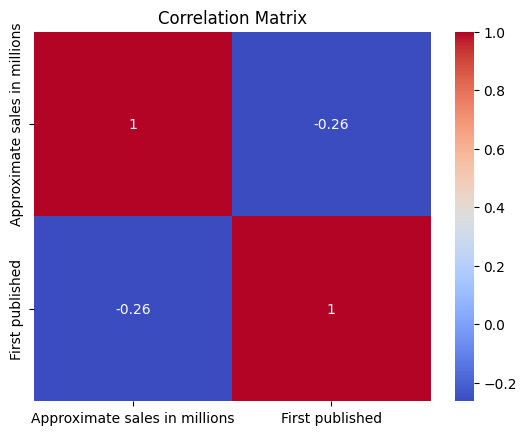

In [23]:
# Compute the correlation matrix
correlation_matrix = df[['Approximate sales in millions', 'First published']].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

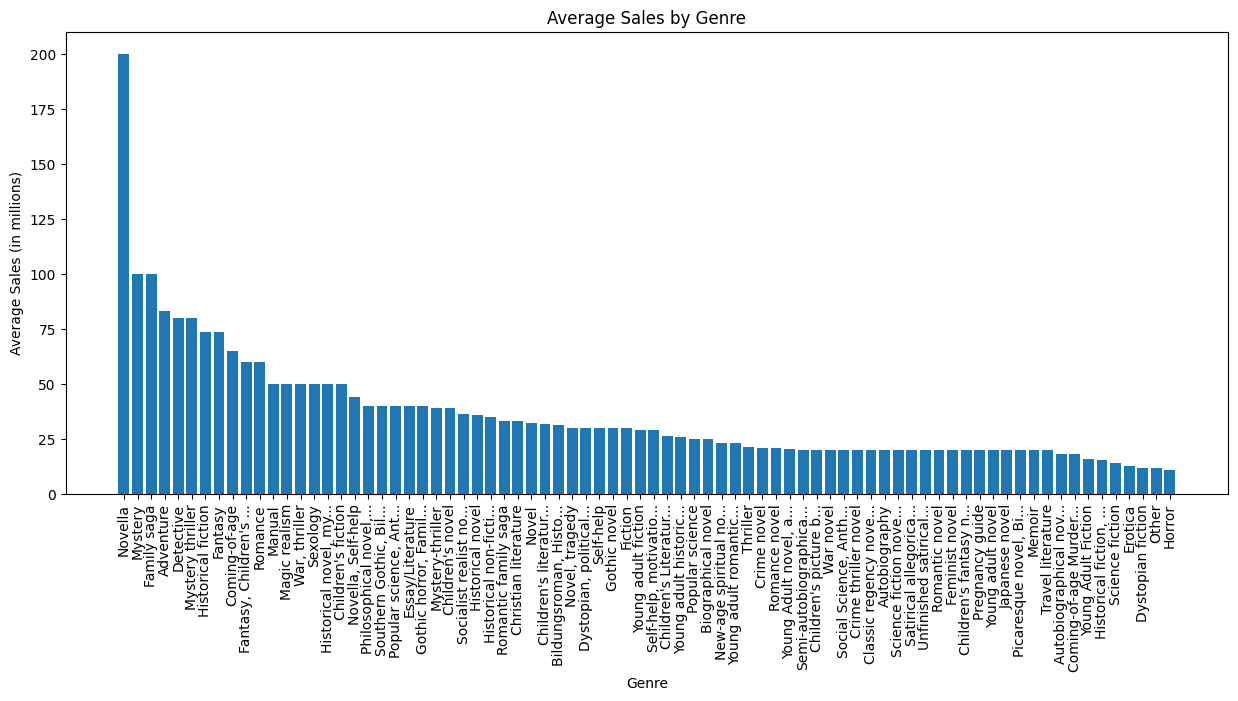

In [24]:
# Calculate the average sales for each genre
average_sales_by_genre = df.groupby('Truncated Genre')['Approximate sales in millions'].mean()

# sort the values in descending order
average_sales_by_genre = average_sales_by_genre.sort_values(ascending=False)

# Plot the average sales by genre
plt.figure(figsize=(15, 6))
plt.bar(average_sales_by_genre.index, average_sales_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Average Sales (in millions)')
plt.title('Average Sales by Genre')
plt.xticks(rotation=90)
plt.show()

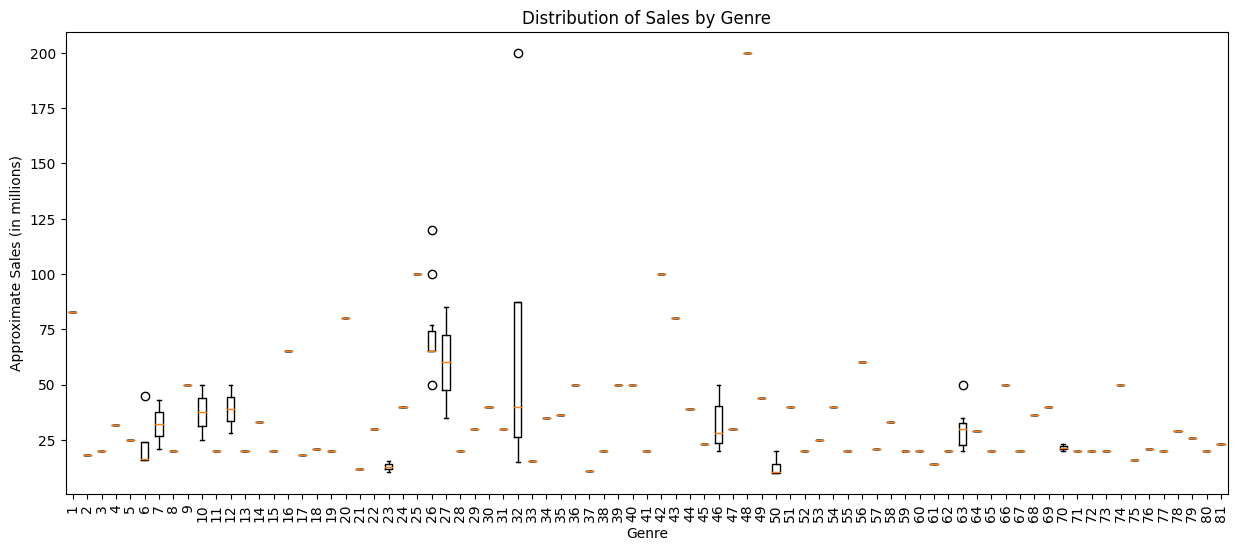

In [25]:
# Create a box plot to visualize the distribution of sales by genre
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Approximate Sales (in millions)')
plt.title('Distribution of Sales by Genre')
plt.boxplot(df.groupby('Genre')['Approximate sales in millions'].apply(list).values)
plt.show()

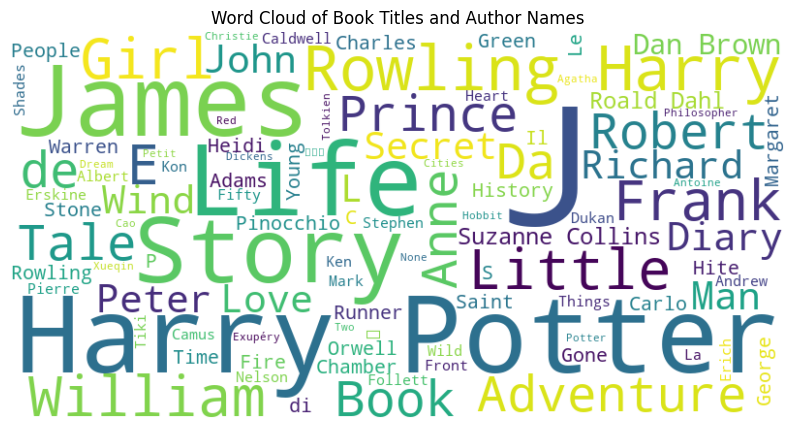

In [26]:
# Concatenate book titles and author names into a single string
text = ' '.join(df['Book'] + ' ' + df['Author(s)'])

# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles and Author Names')
plt.show()

In [27]:
# Create a cross-tabulation between Genre and Original language
cross_tab = pd.crosstab(df['Genre'], df['Original language'])

# Display the cross-tabulation
print(cross_tab)

Original language                                   Chinese  Czech  Dutch  \
Genre                                                                       
Adventure                                                 0      0      0   
Autobiographical novel                                    0      0      0   
Autobiography                                             0      0      0   
Bildungsroman, Historical fiction                         0      0      0   
Biographical novel                                        0      0      0   
...                                                     ...    ...    ...   
Young Adult novel, adventure, war, science fict...        0      0      0   
Young adult fiction                                       0      0      0   
Young adult historical novel                              0      0      0   
Young adult novel                                         0      0      0   
Young adult romantic novel                                0      0      0   

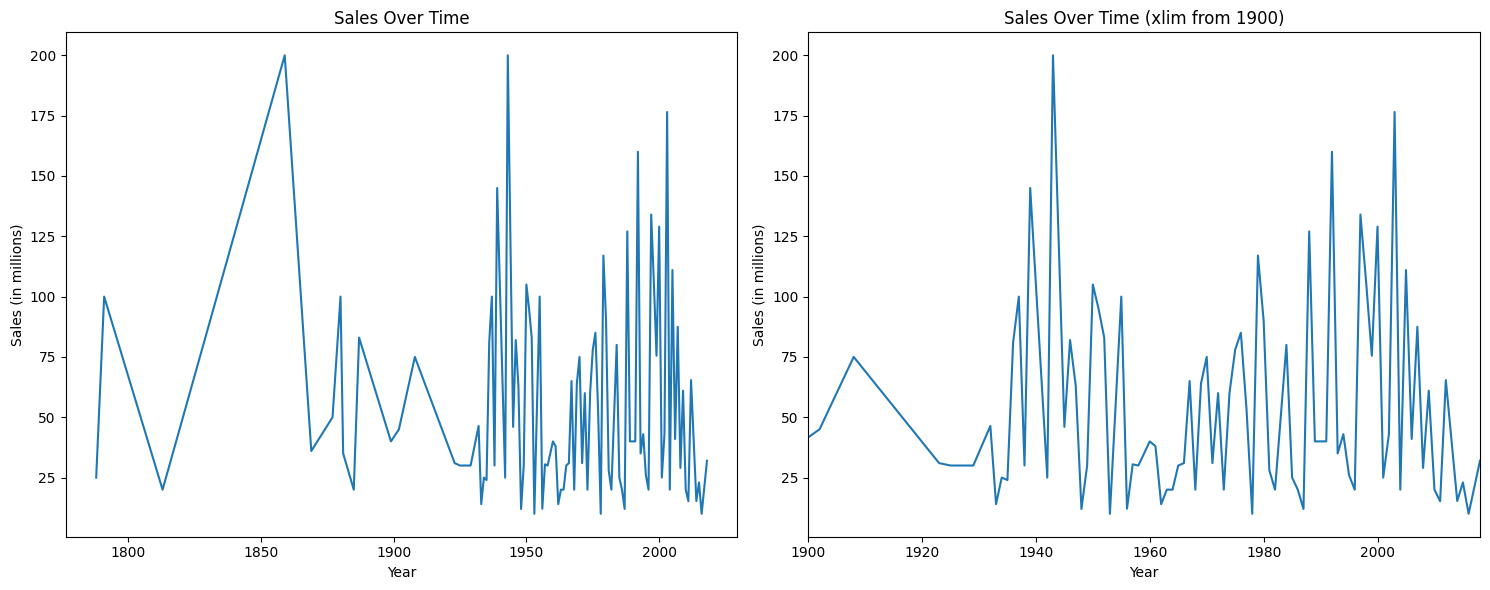

In [28]:
# Convert the 'First published' column to a datetime format
df['First published'] = pd.to_datetime(df['First published'], format='%Y')

# Group the data by publication year and calculate the sum of sales
sales_by_year = df.groupby(df['First published'].dt.year)['Approximate sales in millions'].sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the time series of sales over time
ax1.plot(sales_by_year.index, sales_by_year.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales (in millions)')
ax1.set_title('Sales Over Time')

# Plot the second subplot with xlim starting from 1900
ax2.plot(sales_by_year.index, sales_by_year.values)
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales (in millions)')
ax2.set_title('Sales Over Time (xlim from 1900)')
ax2.set_xlim(1900, max(sales_by_year.index))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Seaborn Charts

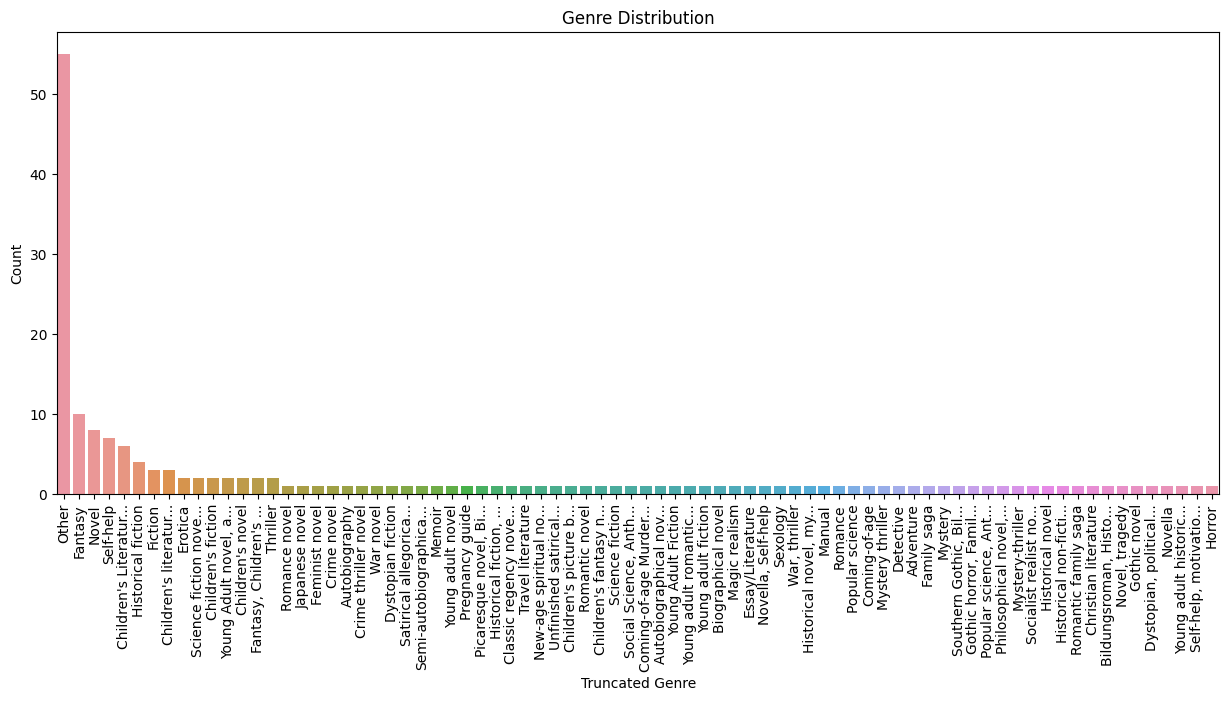

In [29]:
# Plot a bar plot of genre counts
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Truncated Genre', order=df['Truncated Genre'].value_counts().index)
plt.xlabel('Truncated Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()

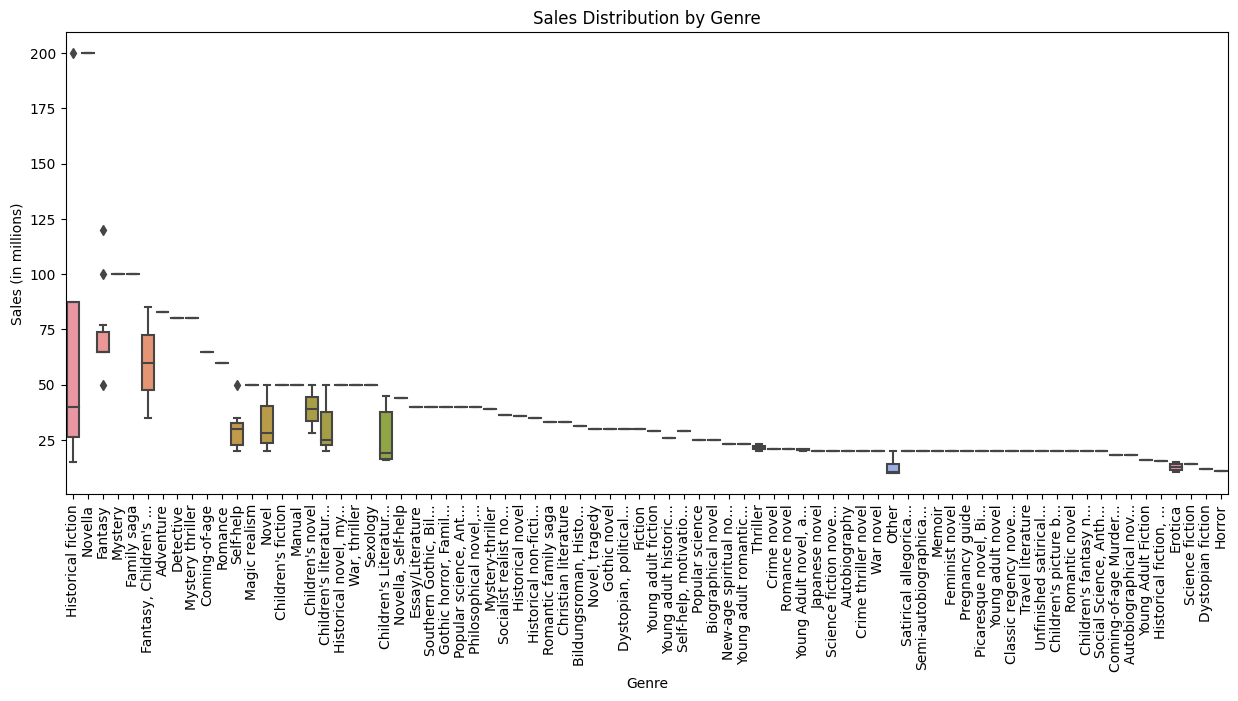

In [30]:
# Plot a box plot of sales by genre
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Truncated Genre', y='Approximate sales in millions')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.title('Sales Distribution by Genre')
plt.xticks(rotation=90)
plt.show()

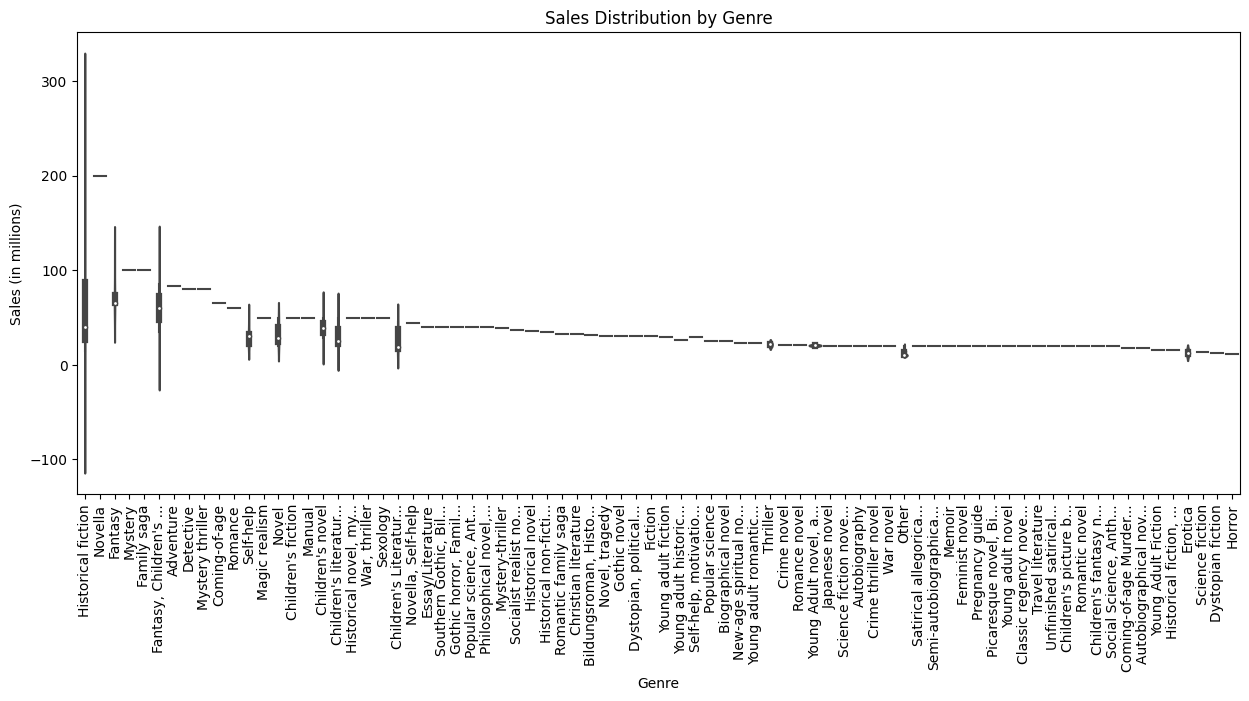

In [31]:
# Plot a violin plot of sales by genre
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='Truncated Genre', y='Approximate sales in millions')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.title('Sales Distribution by Genre')
plt.xticks(rotation=90)
plt.show()

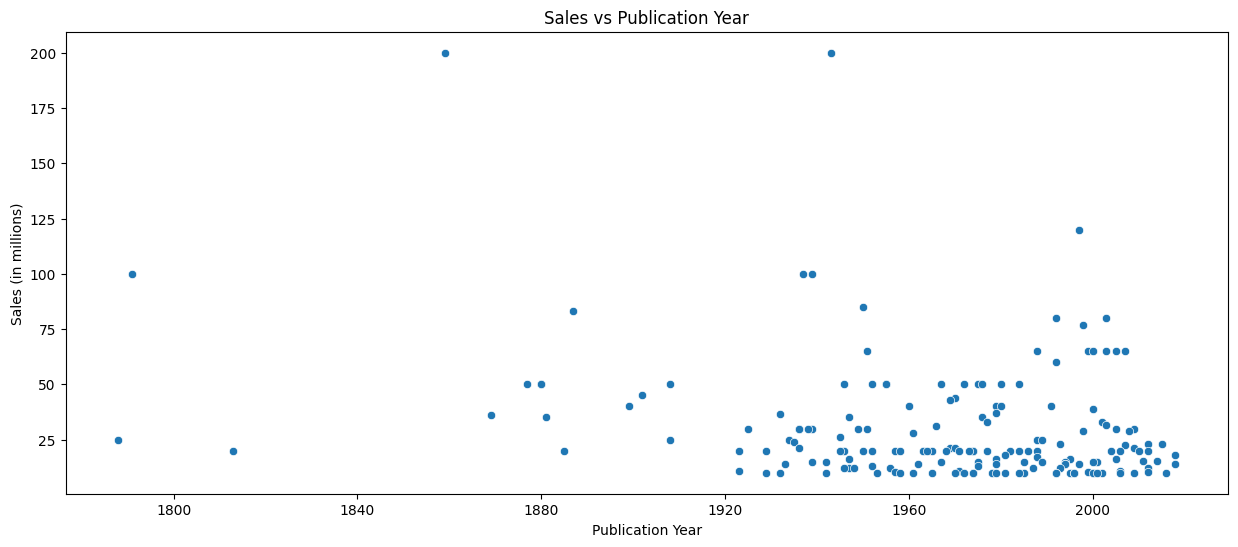

In [32]:
# Plot a scatter plot of sales against publication year
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='First published', y='Approximate sales in millions')
plt.xlabel('Publication Year')
plt.ylabel('Sales (in millions)')
plt.title('Sales vs Publication Year')
plt.show()

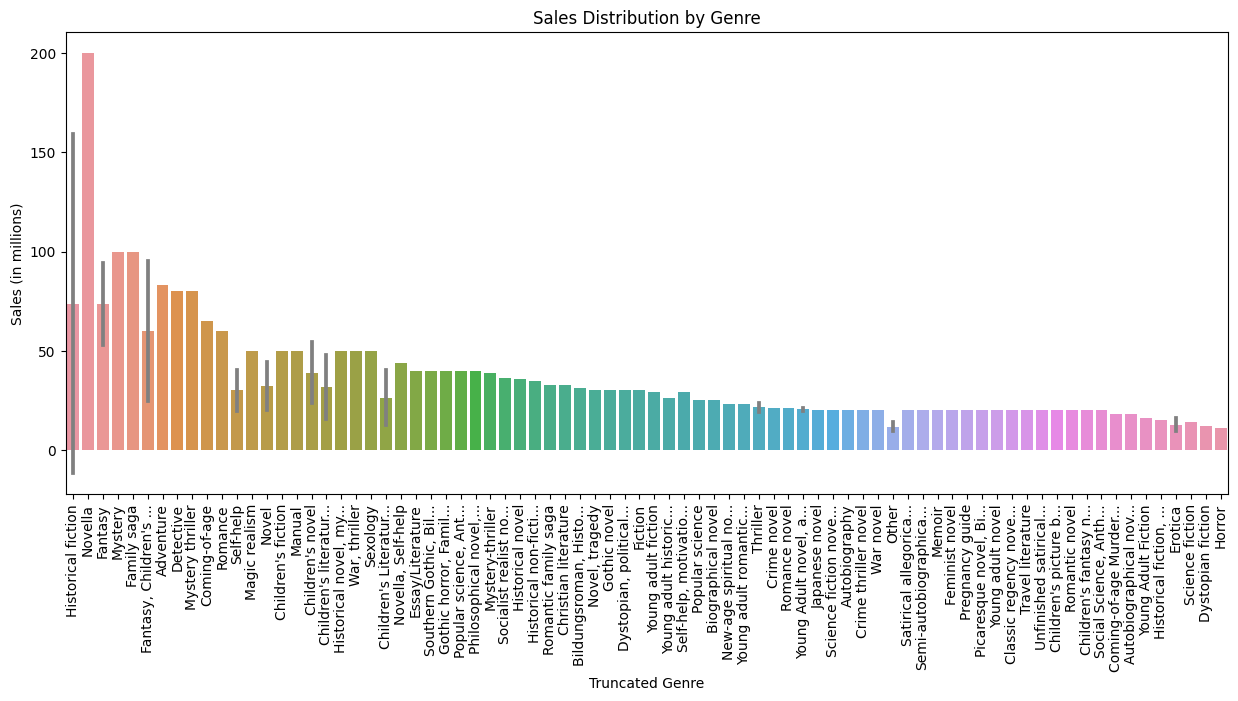

In [33]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Truncated Genre', y='Approximate sales in millions', errorbar='sd', errcolor='gray')
plt.xlabel('Truncated Genre')
plt.ylabel('Sales (in millions)')
plt.title('Sales Distribution by Genre')
plt.xticks(rotation=90)
plt.show()


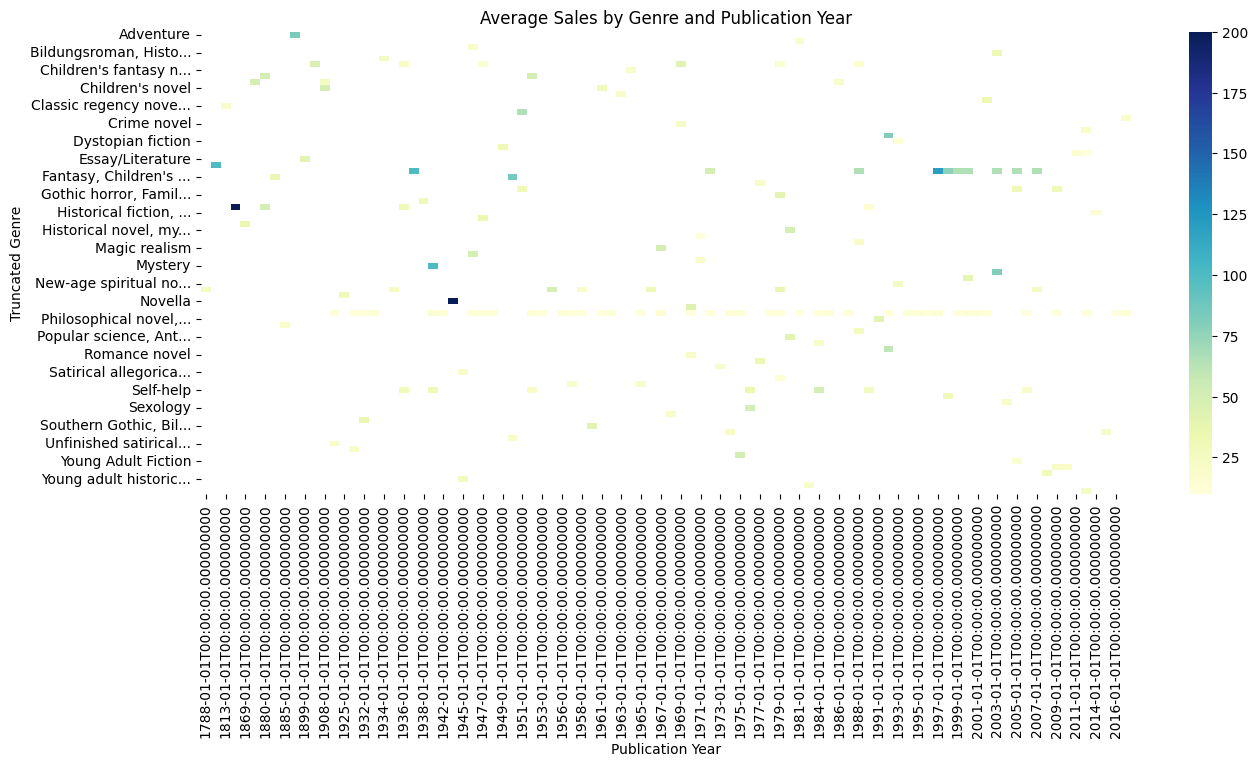

In [34]:
plt.figure(figsize=(15, 6))
pivot_table = df.pivot_table(index='Truncated Genre', columns='First published', values='Approximate sales in millions', aggfunc='mean')
sns.heatmap(data=pivot_table, cmap='YlGnBu')
plt.xlabel('Publication Year')
plt.ylabel('Truncated Genre')
plt.title('Average Sales by Genre and Publication Year')
plt.xticks(rotation=90)
plt.show()


## Interactive Plots

In [35]:
# Create an interactive bar plot using Plotly
fig = px.bar(df, x='Truncated Genre', y='Approximate sales in millions', title='Genre Distribution')
fig.update_layout(xaxis_title='Truncated Genre', yaxis_title='Sales (in millions)')
fig.show()

In [37]:
# Create an interactive scatter plot using Bokeh
p = figure(title='Sales vs Publication Year', x_axis_label='Publication Year', y_axis_label='Sales (in millions)')
p.circle(df['First published'], df['Approximate sales in millions'], size=8, color='navy', alpha=0.5)

hover = HoverTool(tooltips=[('Genre', '@{Truncated Genre}')])
p.add_tools(hover)

show(p)

In [38]:
# Create an interactive scatter plot with hover text
fig = px.scatter(df, x='First published', y='Approximate sales in millions', color='Truncated Genre',
                 hover_name='Book', hover_data=['Author(s)', 'Genre'])
fig.update_layout(xaxis_title='Publication Year', yaxis_title='Sales (in millions)')
fig.show()

In [41]:
# Create an interactive 3D scatter plot with color and size
fig = go.Figure(data=[go.Scatter3d(
    x=df['First published'],
    y=df['Approximate sales in millions'],
    z=df['Genre'],
    mode='markers',
    marker=dict(
        color=df['Approximate sales in millions'],
        size=8,
        colorscale='Viridis',
        colorbar=dict(title='Sales (in millions)')
    )
)])

fig.update_layout(scene=dict(xaxis_title='Publication Year', yaxis_title='Sales (in millions', zaxis_title='Genre'),
                  title='Sales Over Time by Genre', width=800, height=600)
fig.show()

In [42]:
# Create an interactive box plot of sales by genre
fig = px.box(df, x='Truncated Genre', y='Approximate sales in millions', color='Truncated Genre')
fig.update_layout(xaxis_title='Truncated Genre', yaxis_title='Sales (in millions)')
fig.show()

In [43]:
# Create an interactive heatmap of sales by genre and publication year
fig = go.Figure(data=go.Heatmap(
    x=df['First published'],
    y=df['Truncated Genre'],
    z=df['Approximate sales in millions'],
    colorscale='Viridis'
))

fig.update_layout(xaxis_title='Publication Year', yaxis_title='Truncated Genre', title='Sales Heatmap')
fig.show()

In [45]:
# Create an interactive violin plot of sales by genre
fig = px.violin(df, x='Truncated Genre', y='Approximate sales in millions', color='Truncated Genre',
                box=True, points='all', title='Sales Distribution by Genre')
fig.update_layout(xaxis_title='Truncated Genre', yaxis_title='Sales (in millions)')
fig.show()

In [46]:
# Create an interactive sunburst chart of genre hierarchy
fig = px.sunburst(df, path=['Truncated Genre', 'Genre'], values='Approximate sales in millions')
fig.update_layout(title='Genre Hierarchy and Sales')
fig.show()

In [47]:
# Create an interactive funnel chart of sales funnel stages
labels = ['Awareness', 'Consideration', 'Purchase', 'Retention']
values = [500, 350, 250, 150]

fig = go.Figure(go.Funnel(
    y=labels,
    x=values,
    textinfo='value+percent initial',
    marker=dict(color='teal'),
    opacity=0.7
))

fig.update_layout(title='Sales Funnel')
fig.show()